In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from datetime import date,time,datetime,timedelta

In [3]:
friday = date(2019,11,22)
friday

datetime.date(2019, 11, 22)

In [4]:
today = date.today()
today

datetime.date(2019, 11, 25)

In [5]:
today.year

2019

In [6]:
noon = time(12,0,0)
noon

datetime.time(12, 0)

In [7]:
noon.hour

12

In [8]:
friday_afternoon = datetime(2019,11,22,15,30)
friday_afternoon

datetime.datetime(2019, 11, 22, 15, 30)

In [9]:
now = datetime.now()
now

datetime.datetime(2019, 11, 25, 8, 40, 21, 343260)

In [10]:
diff = datetime(2019,11,23,1) - datetime(2019,11,22)
diff

datetime.timedelta(days=1, seconds=3600)

In [11]:
diff.total_seconds()

90000.0

In [12]:
#days,seconds,microseconds,milliseconds,minutes,hours,weeks
one_day = timedelta(1)

In [13]:
date(2019,11,22) + 2*one_day

datetime.date(2019, 11, 24)

In [14]:
print(now)

2019-11-25 08:40:21.343260


In [15]:
now.strftime('%a %h %d, %Y %I:%M %p')

'Mon Nov 25, 2019 08:40 AM'

In [16]:
import pandas as pd

pd.to_datetime('11/22/2019 2:36pm')

Timestamp('2019-11-22 14:36:00')

In [17]:
dt_index = pd.to_datetime(['11/22/2019 2:36pm','11/23/2001',None])
dt_index

DatetimeIndex(['2019-11-22 14:36:00', '2001-11-23 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [18]:
# pandas can handle many date formats
dt_index = pd.to_datetime([datetime(2019, 11, 26),
                           '27th of November, 2019',
                           '2019-Nov-28',
                           '11-29-2019',
                           '20191201',
                           None
                          ])
dt_index

DatetimeIndex(['2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
               '2019-12-01', 'NaT'],
              dtype='datetime64[ns]', freq=None)

In [19]:
dt_index[0]

Timestamp('2019-11-26 00:00:00')

In [20]:
s = pd.Series([101,102,103],index=pd.to_datetime(['20191201','20200101','20200201']))
s

2019-12-01    101
2020-01-01    102
2020-02-01    103
dtype: int64

In [21]:
s.iloc[0:2]

2019-12-01    101
2020-01-01    102
dtype: int64

In [22]:
s['2020']

2020-01-01    102
2020-02-01    103
dtype: int64

In [23]:
s['2020-01']

2020-01-01    102
dtype: int64

In [24]:
s['01/01/2019':'01/01/2020']

2019-12-01    101
2020-01-01    102
dtype: int64

In [25]:
df = pd.DataFrame({'Dates':['12/1/2019','1/1/2020'],'Feature1':[101,102]})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
Dates       2 non-null object
Feature1    2 non-null int64
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


In [26]:
df = pd.DataFrame([['12/1/2019',101,'A'],['1/1/2020',102,'B']],columns=['col1','col2','col3'])
df.col1 = pd.to_datetime(df.col1)
df.set_index('col1',drop=True,inplace=True)
print(df)

            col2 col3
col1                 
2019-12-01   101    A
2020-01-01   102    B


In [27]:
print(df.loc['2020'])

            col2 col3
col1                 
2020-01-01   102    B


In [28]:
s = pd.Series([101,103],index=pd.to_datetime(['20191201','20191203']))
s

2019-12-01    101
2019-12-03    103
dtype: int64

In [29]:
s.resample('D').asfreq()

2019-12-01    101.0
2019-12-02      NaN
2019-12-03    103.0
Freq: D, dtype: float64

In [30]:
pd.to_datetime(['20191201','20191203'])

DatetimeIndex(['2019-12-01', '2019-12-03'], dtype='datetime64[ns]', freq=None)

In [31]:
pd.date_range(start='20191201',end='20191203',freq='D')

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03'], dtype='datetime64[ns]', freq='D')

In [32]:
ts = pd.date_range('11/2/2019 9:30am',periods=2,freq='D')
ts

DatetimeIndex(['2019-11-02 09:30:00', '2019-11-03 09:30:00'], dtype='datetime64[ns]', freq='D')

In [33]:
ts_utc = ts.tz_localize('UTC')
ts_utc

DatetimeIndex(['2019-11-02 09:30:00+00:00', '2019-11-03 09:30:00+00:00'], dtype='datetime64[ns, UTC]', freq='D')

In [34]:
ts_utc.tz_convert('US/Eastern')

DatetimeIndex(['2019-11-02 05:30:00-04:00', '2019-11-03 04:30:00-05:00'], dtype='datetime64[ns, US/Eastern]', freq='D')

In [35]:
datetime.utcnow()

datetime.datetime(2019, 11, 25, 13, 40, 21, 713333)

In [36]:
now.utcnow()

datetime.datetime(2019, 11, 25, 13, 40, 21, 721439)

In [37]:
import pytz

In [38]:
[x for x in pytz.common_timezones if x.startswith('U')]

['US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

In [39]:
ts = pd.Series([1,2,8],
               index=pd.date_range('1/1/2019',periods=3,freq='M'))
ts

2019-01-31    1
2019-02-28    2
2019-03-31    8
Freq: M, dtype: int64

In [40]:
ts.shift(1) # old value

2019-01-31    NaN
2019-02-28    1.0
2019-03-31    2.0
Freq: M, dtype: float64

In [41]:
# (new_value - old_value) / old_value = (new_value/old_value) - 1
ts/ ts.shift(1) - 1

2019-01-31    NaN
2019-02-28    1.0
2019-03-31    3.0
Freq: M, dtype: float64

In [42]:
ts/ts.shift(1,freq='M') - 1

2019-01-31    NaN
2019-02-28    1.0
2019-03-31    3.0
2019-04-30    NaN
Freq: M, dtype: float64

In [43]:
#from pandas_datareader import data
#twtr = data.DataReader('TWTR', start='2013', end='2018',
#                        data_source='yahoo')

twtr = pd.read_csv('../data/twtr_2013-2018.csv',parse_dates=['Date'])
twtr = twtr.set_index('Date')
print(twtr.head())

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2013-11-07  50.090000  44.000000  45.099998  44.900002  117701600  44.900002
2013-11-08  46.939999  40.689999  45.930000  41.650002   27925300  41.650002
2013-11-11  43.000000  39.400002  40.500000  42.900002   16113900  42.900002
2013-11-12  43.779999  41.830002  43.660000  41.900002    6316700  41.900002
2013-11-13  42.869999  40.759998  41.029999  42.599998    8688300  42.599998


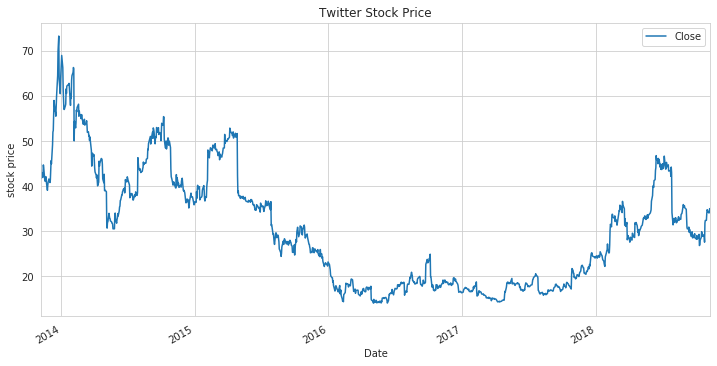

In [44]:
twtr.Close.plot(figsize=(12,6));
plt.ylabel('stock price'); plt.title('Twitter Stock Price');plt.legend()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/twitter_close.png')

In [45]:
print((twtr / twtr.shift(1) - 1).head())

                High       Low      Open     Close    Volume  Adj Close
Date                                                                   
2013-11-07       NaN       NaN       NaN       NaN       NaN        NaN
2013-11-08 -0.062887 -0.075227  0.018404 -0.072383 -0.762745  -0.072383
2013-11-11 -0.083937 -0.031703 -0.118223  0.030012 -0.422964   0.030012
2013-11-12  0.018140  0.061675  0.078025 -0.023310 -0.607997  -0.023310
2013-11-13 -0.020786 -0.025580 -0.060238  0.016706  0.375449   0.016706


In [46]:
twtr.index

DatetimeIndex(['2013-11-07', '2013-11-08', '2013-11-11', '2013-11-12',
               '2013-11-13', '2013-11-14', '2013-11-15', '2013-11-18',
               '2013-11-19', '2013-11-20',
               ...
               '2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-02', '2018-11-05', '2018-11-06', '2018-11-07',
               '2018-11-08', '2018-11-09'],
              dtype='datetime64[ns]', name='Date', length=1262, freq=None)

In [47]:
twtr_B = twtr.resample('B').asfreq()

In [48]:
twtr_B.index

DatetimeIndex(['2013-11-07', '2013-11-08', '2013-11-11', '2013-11-12',
               '2013-11-13', '2013-11-14', '2013-11-15', '2013-11-18',
               '2013-11-19', '2013-11-20',
               ...
               '2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-02', '2018-11-05', '2018-11-06', '2018-11-07',
               '2018-11-08', '2018-11-09'],
              dtype='datetime64[ns]', name='Date', length=1307, freq='B')

In [49]:
twtr_BQ = twtr.resample('BQ')
print(twtr_BQ)

DatetimeIndexResampler [freq=<BusinessQuarterEnd: startingMonth=12>, axis=0, closed=right, label=right, convention=start, base=0]


In [50]:
pd.set_option('expand_frame_repr', False)
# note the frequency and the interval
print(twtr_BQ.mean().head(3))

                 High        Low       Open      Close        Volume  Adj Close
Date                                                                           
2013-12-31  51.061892  47.848108  49.208919  49.657568  2.285179e+07  49.657568
2014-03-31  57.966558  55.557705  56.952459  56.587049  1.584258e+07  56.587049
2014-06-30  38.741905  37.008254  37.923651  37.854603  2.675303e+07  37.854603


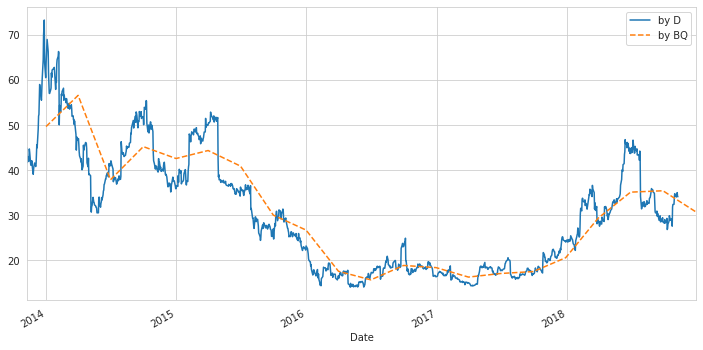

In [51]:
fig = plt.figure(figsize=(12,6))
twtr.Close.plot(style='-', label='by D')
twtr_BQ.Close.mean().plot(style='--',label='by BQ')
plt.legend(loc='upper right');
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/twtr_downsample.png')

In [52]:
twtr.Close.resample('H').asfreq().head(3)

Date
2013-11-07 00:00:00    44.900002
2013-11-07 01:00:00          NaN
2013-11-07 02:00:00          NaN
Freq: H, Name: Close, dtype: float64

In [53]:
twtr.Close.resample('H').ffill().head(3)

Date
2013-11-07 00:00:00    44.900002
2013-11-07 01:00:00    44.900002
2013-11-07 02:00:00    44.900002
Freq: H, Name: Close, dtype: float64

In [54]:
twtr.Close.resample('H').bfill().head(3)

Date
2013-11-07 00:00:00    44.900002
2013-11-07 01:00:00    41.650002
2013-11-07 02:00:00    41.650002
Freq: H, Name: Close, dtype: float64

In [55]:
# create a centered rolling window of one year
rolling = twtr.Close.rolling(30, center=True)
rolling

Rolling [window=30,center=True,axis=0]

In [56]:
rolling.mean()['2013-11-25':'2013-12-3']

Date
2013-11-25          NaN
2013-11-26          NaN
2013-11-27          NaN
2013-11-29    46.053334
2013-12-02    46.557000
2013-12-03    47.320000
Name: Close, dtype: float64

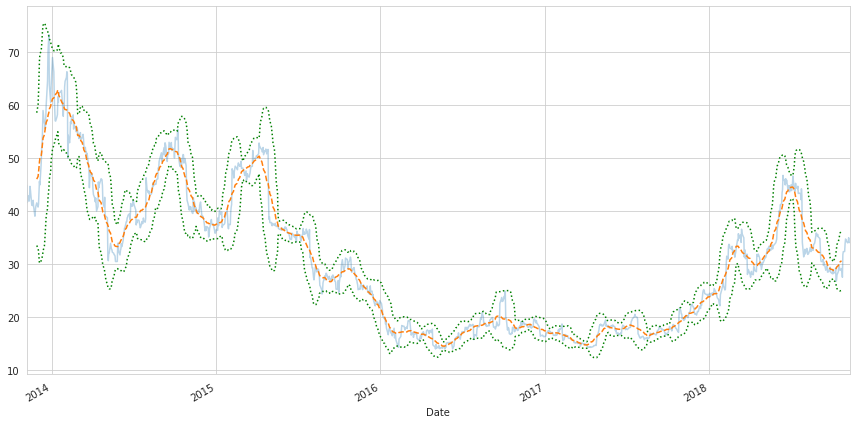

In [57]:
fig,ax = plt.subplots(1,1,figsize=(12,6));
twtr.Close.plot(style='-',alpha=0.3);
rolling.mean().plot(style='--');
(rolling.mean() + 2*rolling.std()).plot(style=':',c='g');
(rolling.mean() - 2*rolling.std()).plot(style=':',c='g');
plt.tight_layout()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/twtr_rolling.png')

In [58]:
# Gather data of bike activity on Fremont Bridge from 2012-2017
!curl -o ../data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1934k    0 1934k    0     0  1115k      0 --:--:--  0:00:01 --:--:-- 1115k


In [59]:
# load the data
df = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
df = df.loc['2015':'2017']
df.columns = ['Total','East','West']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2015-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 3 columns):
Total    26299 non-null float64
East     26299 non-null float64
West     26299 non-null float64
dtypes: float64(3)
memory usage: 822.0 KB


In [60]:
f'proportion missing: {sum(df.Total.isna()) / len(df):0.5f}'

'proportion missing: 0.00019'

In [61]:
df = df.fillna(method='ffill')
print(df.head(3))

                     Total  East  West
Date                                  
2015-01-01 00:00:00   13.0   4.0   9.0
2015-01-01 01:00:00   27.0   4.0  23.0
2015-01-01 02:00:00   19.0   5.0  14.0


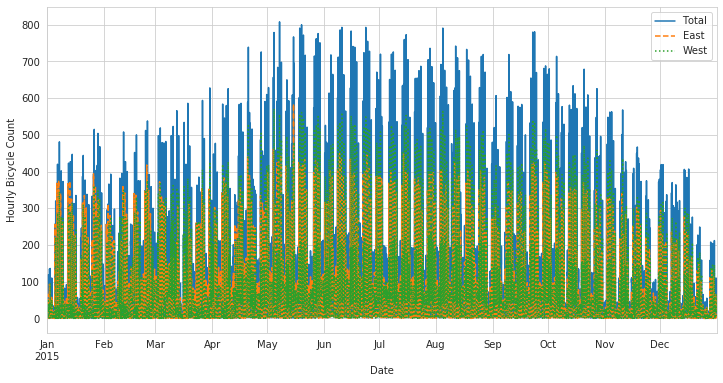

In [62]:
# plot data from 2015
df['2015'].plot(style=['-', '--', ':'],figsize=(12,6))
plt.ylabel('Hourly Bicycle Count');
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/bike_hourly.png')

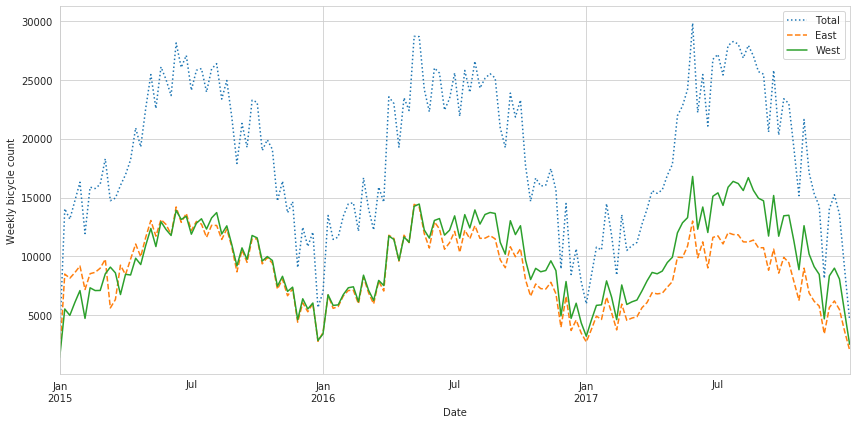

In [63]:
# downsample to weekly sum to smooth things out
weekly = df.resample('W').sum()
weekly.plot(style=[':', '--', '-'], figsize=(12,6))
plt.ylabel('Weekly bicycle count');
plt.tight_layout()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/bike_weekly.png')

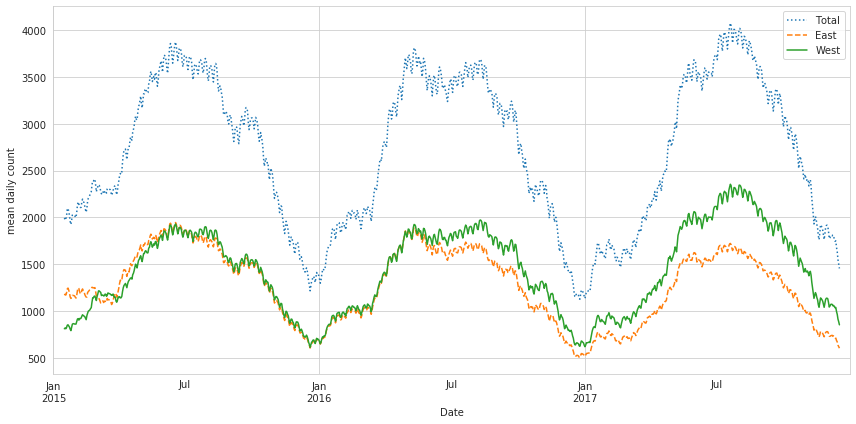

In [64]:
# resample at daily for a more granular view
# then apply a rolling window of 30 days to smooth things out
daily = df.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'], figsize=(12,6))
plt.ylabel('mean daily count');
plt.tight_layout()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/bike_daily_rolling.png')

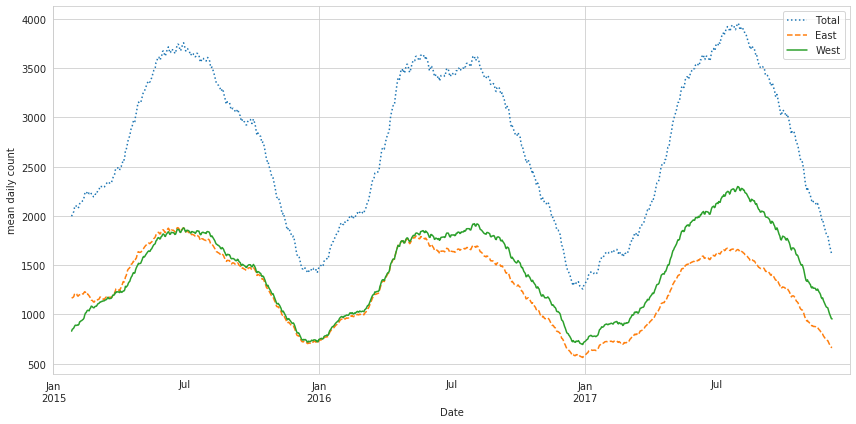

In [65]:
# a wider window using a gaussian filter smooths more while 
# accentuating daily differences
daily.rolling(50, center=True,
              win_type='gaussian').mean(std=30).plot(style=[':', '--', '-'],
                                                    figsize=(12,6));
plt.ylabel('mean daily count');
plt.tight_layout()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/bike_daily_rolling_gaussian.png')

In [66]:
#if we want to only look at time of day
df.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [67]:
# get mean data by time (hourly)
by_time = df.groupby(df.index.time).mean()
print(by_time.head(3))

              Total      East      West
00:00:00  11.319343  4.806569  6.512774
01:00:00   5.743613  2.613139  3.130474
02:00:00   3.615876  1.687956  1.927920


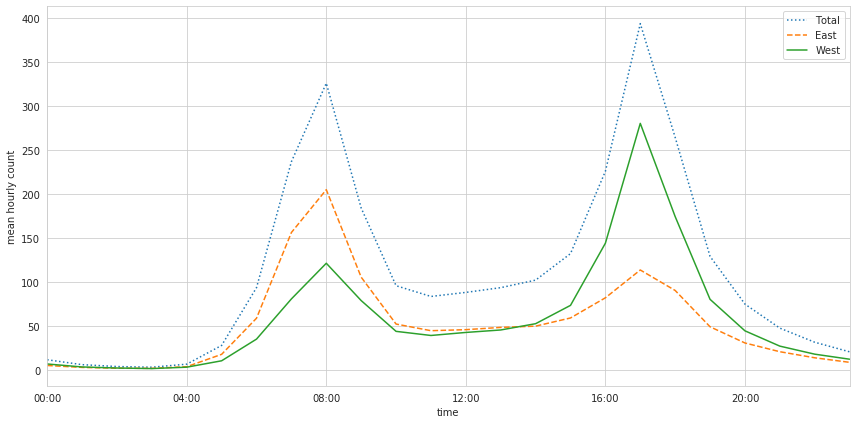

In [68]:
# create xticks every 4 hours
hourly_ticks = 60 * 60 * 4 * np.arange(6)  # sec * min * every4hours
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize=(12,6));
plt.ylabel('mean hourly count');
plt.tight_layout()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/bike_hourly.png')

In [70]:
# can also look at average by day of week
by_weekday = df.groupby(df.index.dayofweek).mean()

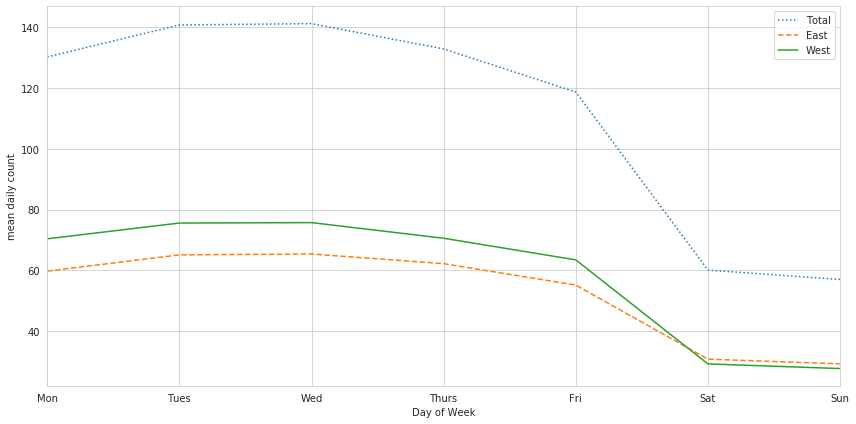

In [81]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
by_weekday.plot(style=[':', '--', '-'], ax=ax);
ax.set_xlabel('Day of Week');ax.set_ylabel('mean daily count')
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);
plt.tight_layout()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/bike_weekday.png')

In [84]:
# create a weekend mask
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
# get hourly mean values split by weekday, weekend
by_time = df.groupby([weekend, df.index.time]).mean()

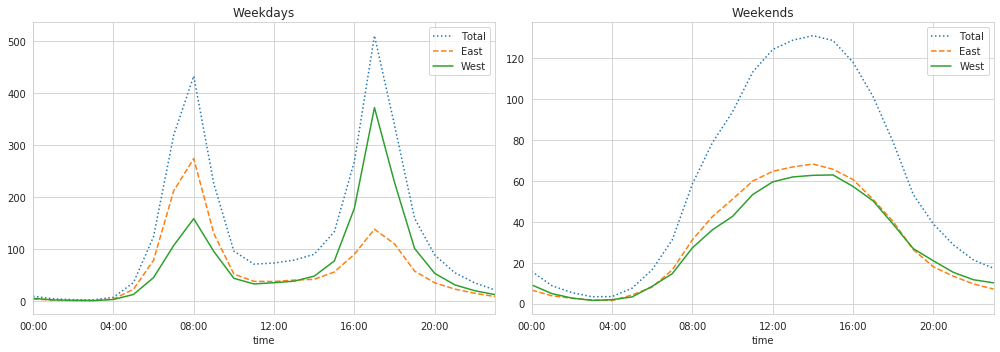

In [87]:
# plot weekday and weekend hourly summary separately
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);
plt.tight_layout()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/bike_weekday_weekend.png')

In [90]:
!head ../data/web_page_data.csv

Page,Time
Page A,12.6
Page B,151.79999999999998
Page A,21.0
Page B,42.599999999999994
Page A,40.2
Page B,51.0
Page A,126.6
Page B,147.6
Page A,79.2


In [96]:
df = pd.read_csv('../data/example.csv')
print(df)

   Year   Make                                   Model                         Description   Price
0  1997   Ford                                    E350                       ac, abs, moon  3000.0
1  1999  Chevy              Venture "Extended Edition"                                 NaN  4900.0
2  1999  Chevy  Venture "Extended Edition, Very Large"                                 NaN  5000.0
3  1996   Jeep                          Grand Cherokee  MUST SELL!\nair, moon roof, loaded  4799.0


In [94]:
df

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000.0
1,1999,Chevy,"Venture ""Extended Edition""",NaN,4900.0
2,1999,Chevy,"Venture ""Extended Edition, Very Large""",NaN,5000.0
3,1996,Jeep,Grand Cherokee,"MUST SELL!\nair, moon roof, loaded",4799.0


In [103]:
import json

In [106]:
json.loads(df.to_json(orient='index'))

{'0': {'Year': 1997,
  'Make': 'Ford',
  'Model': 'E350',
  'Description': 'ac, abs, moon',
  'Price': 3000.0},
 '1': {'Year': 1999,
  'Make': 'Chevy',
  'Model': 'Venture "Extended Edition"',
  'Description': None,
  'Price': 4900.0},
 '2': {'Year': 1999,
  'Make': 'Chevy',
  'Model': 'Venture "Extended Edition, Very Large"',
  'Description': None,
  'Price': 5000.0},
 '3': {'Year': 1996,
  'Make': 'Jeep',
  'Model': 'Grand Cherokee',
  'Description': 'MUST SELL!\nair, moon roof, loaded',
  'Price': 4799.0}}

In [109]:
html = """
<html>
    <head>
        <title>Example</title>
    </head>
    <body>
        <p id="first" class="example"><strong>Example text!</strong></p>
        <p id="second" class="example">And More!</p>
    </body>
</html>
"""

In [113]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html)

[p.text for p in soup('p')]

['Example text!', 'And More!']

In [116]:
df.to_parquet('../data/example.parquet')

In [117]:
%cat ../data/example.parquet

PAR100L  � <�      �       ,�      �          
$   � &�5 Year��&T&�      �       (�      �         26L  `   Ford   Chevy   Jeep ,JeepChevy    
$   � &�5 Make��&�&�6 (JeepChevy   ��L  b�   E350   Venture "Extended Edition"&n x, Very Large"   Grand Cherokee ,&Venture "Extended Edition, Very Large"E350    
   ac, abs, moon!   MUST SELL!
ac, abs, moon!MUST SELL!
ac, abs, moon!MUST SELL!
air, moon roof, loaded   @:L     p�@ $�	(��@     ��@ ,     ��@     p�@    
$   � &�
&�     ��@     p�@ (     ��@     p�@   l5 schema
 %Year %Make%  %Model%  %Description%  
ac, abs, moon!MUST SELL!
air, moon roof, loaded   &�
&�     ��@     p�@ (     ��@     p�@   �	 pandas�{"index_columns": [{"kind": "range", "name": null, "start": 0, "st

In [119]:
import requests
url = 'http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json&titles='
title = 'Data Science'
title = title.replace(' ','%20')
print(url+title)

http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json&titles=Data%20Science


In [120]:
resp = requests.get(url+title)
resp.json()

{'batchcomplete': '',
 'query': {'pages': {'49495124': {'pageid': 49495124,
    'ns': 0,
    'title': 'Data Science',
    'contentmodel': 'wikitext',
    'pagelanguage': 'en',
    'pagelanguagehtmlcode': 'en',
    'pagelanguagedir': 'ltr',
    'touched': '2019-11-22T01:43:30Z',
    'lastrevid': 706007296,
    'length': 26,
    'redirect': '',
    'new': ''}}}}

In [135]:
with open('/home/bgibson/proj/twitter/twitter_consumer_key.txt') as f:
    consumer_key = f.read().strip()
with open('/home/bgibson/proj/twitter/twitter_consumer_secret.txt') as f:
    consumer_secret = f.read().strip()
with open('/home/bgibson/proj/twitter/twitter_access_token.txt') as f:
    access_token = f.read().strip()
with open('/home/bgibson/proj/twitter/twitter_access_token_secret.txt') as f:
    access_token_secret = f.read().strip()

from twython import Twython
    
twitter = Twython(consumer_key,consumer_secret,access_token,access_token_secret)

In [143]:
public_tweets = twitter.search(q='columbia')['statuses']
for status in public_tweets[:5]:
    print('-------')
    print(status["text"])

-------
RT @kayleighxdowd: Wow... I- i can’t believe this is real life. The purge is happening in Columbia. I remember watching the movie and being…
-------
RT @kissi_6543: Someone PLEASE tell me why I had to find out that Columbia basically had a Purge yesterday through a Tik Tok. I saw this an…
-------
Why Columbia, then Franklin? The supply-bearing Nashville and Decatur Railroad ran through Pulaski and Columbia, as… https://t.co/hseY9KqnuO
-------
RT @kathy_perez06: Everyone please be careful around Columbia Pike in Arlington, VA. Some sick fuck asked a close friend to help them with…
-------
@RobertGSilvermn @CampbellWriter @siggyflicker @Columbia @TheAENetwork @MiriamElman @LawfareProject @GoldsteinBrooke https://t.co/64Yj7h2yCk


In [ ]:
-------
RT @NWRiverPartners: Find it difficult to keep track of all of the fish and wildlife efforts being made in the Columbia River basin? The ne…
-------
RT @TrailerTodd: 18 Wheeler - Big Rig 2008 Freightliner Columbia Tandem Daycab Tractor Truck #7442 https://t.co/1GtX7bj6QC Semi Truck For S…
-------
I swear to god working at Columbia Uni must rot one's brain

In [158]:
from sklearn.svm import SVC
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

# generate some data to play with
X, y = samples_generator.make_classification(
    n_informative=5, n_redundant=0, random_state=42)
X.shape

(100, 20)

In [161]:
feature_filter = SelectKBest(f_regression, k=5)

clf = SVC(kernel='linear')

pipeline = Pipeline([('select', feature_filter), ('svc', clf)])

pipeline.set_params(select__k=10, svc__C=.1).fit(X, y)

Pipeline(memory=None,
         steps=[('select',
                 SelectKBest(k=10,
                             score_func=<function f_regression at 0x7fad4a96b050>)),
                ('svc',
                 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [163]:
pipeline.score(X,y)  

0.83

In [168]:
pipeline['select'].get_support()

array([False, False,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False])

In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [171]:
# Read data from Titanic dataset.
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)

In [172]:
# We will train our classifier with the following features:
# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [173]:
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [174]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [175]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

In [178]:
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: {:.3f}".format(clf.score(X_test, y_test)))

model score: 0.775


In [180]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False)
grid_search.fit(X_train, y_train)

print("best logistic regression from grid search: {:.3f}".format(grid_search.score(X_test, y_test)))

best logistic regression from grid search: 0.775


In [182]:
from flask import Flask, escape, request

app = Flask(__name__)

@app.route('/')
def hello():
    name = request.args.get("name", "World")
    return f'Hello, {escape(name)}!'

In [186]:
r = requests.get('http://127.0.0.1:5000/?name=Bryan')
r.text

'Hello, Bryan!'

In [191]:
import pickle as pkl

with open('../src/titanic_clf.pkl','wb') as f:
    pkl.dump(grid_search,f)

In [190]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [212]:
X.iloc[:1].to_json()

'{"pclass":{"0":1},"name":{"0":"Allen, Miss. Elisabeth Walton"},"sex":{"0":"female"},"age":{"0":29.0},"sibsp":{"0":0},"parch":{"0":0},"ticket":{"0":"24160"},"fare":{"0":211.3375},"cabin":{"0":"B5"},"embarked":{"0":"S"},"boat":{"0":"2"},"body":{"0":null},"home.dest":{"0":"St Louis, MO"}}'

In [210]:
pd.read_json(X.iloc[:1].to_json())

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


In [205]:
clf.predict(X.iloc[:1])

array([1])

In [211]:
with open('../src/titanic_clf.pkl','rb') as f:
    clf = pkl.load(f)

In [338]:
bike_counts = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
bike_weather = pd.read_csv('../data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [339]:
daily = bike_counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
print(daily.head(3))

             Total
Date              
2012-10-03  7042.0
2012-10-04  6950.0
2012-10-05  6296.0


In [340]:
daily.index.year.value_counts()

2016    366
2017    365
2015    365
2013    365
2018    365
2014    365
2019    304
2012     90
Name: Date, dtype: int64

In [341]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
print(daily.head(3))

             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun
Date                                                 
2012-10-03  7042.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2012-10-04  6950.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2012-10-05  6296.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0


In [342]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)
print(daily.head(3))

             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday
Date                                                          
2012-10-03  7042.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0
2012-10-04  6950.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0
2012-10-05  6296.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0


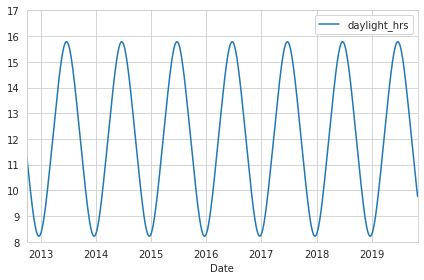

In [343]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index));
daily[['daylight_hrs']].plot();
plt.ylim(8, 17);
plt.tight_layout()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/bike_daylight.png')

In [344]:
# temperatures are in 1/10 deg C; convert to C
bike_weather['TMIN'] /= 10
bike_weather['TMAX'] /= 10
bike_weather['Temp (C)'] = 0.5 * (bike_weather['TMIN'] + bike_weather['TMAX'])

# precip is in 1/10 mm; convert to inches
bike_weather['PRCP'] /= 254
bike_weather['dry day'] = (bike_weather['PRCP'] == 0).astype(int)

daily = daily.join(bike_weather[['PRCP', 'Temp (C)', 'dry day']])
print(daily.head(3))

             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  PRCP  Temp (C)  dry day
Date                                                                                                 
2012-10-03  7042.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   0.0     13.35      1.0
2012-10-04  6950.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   0.0     13.60      1.0
2012-10-05  6296.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   0.0     15.30      1.0


In [345]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.
print(daily.head(3))

             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  PRCP  Temp (C)  dry day    annual
Date                                                                                                           
2012-10-03  7042.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   0.0     13.35      1.0  0.000000
2012-10-04  6950.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   0.0     13.60      1.0  0.002740
2012-10-05  6296.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   0.0     15.30      1.0  0.005479


In [347]:
from sklearn.linear_model import LinearRegression

daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

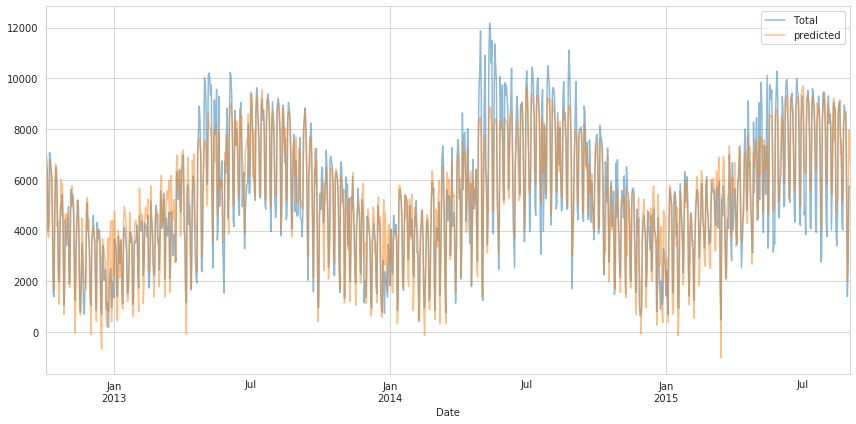

In [348]:
daily[['Total', 'predicted']].plot(alpha=0.5,figsize=(12,6))
plt.tight_layout()
plt.savefig('../slides/eods-11-timeseries-dataprocessinganddelivery/images/bike_predictedvstotal.png')

In [333]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    params = pd.Series(model.coef_, index=X.columns)
    print(params)

Mon             1009.77
Tue             1220.47
Wed             1185.35
Thu              964.72
Fri              355.96
Sat            -2206.60
Sun            -2267.13
holiday        -2374.80
daylight_hrs     257.70
PRCP           -1329.67
dry day         1095.40
Temp (C)         130.33
annual            53.89
dtype: float64


In [334]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [335]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(pd.DataFrame({'effect': params.round(0),
                        'error': err.round(0)}))

               effect  error
Mon           1010.00 173.00
Tue           1220.00 166.00
Wed           1185.00 166.00
Thu            965.00 170.00
Fri            356.00 162.00
Sat          -2207.00 159.00
Sun          -2267.00 166.00
holiday      -2375.00 326.00
daylight_hrs   258.00  18.00
PRCP         -1330.00 125.00
dry day       1095.00  66.00
Temp (C)       130.00   7.00
annual          54.00  35.00
